# BDA Midterm project
組別：第7組  <br>
組員：資管三 杜沛慈、經濟三 胡南圳、圖資四 凌麗、圖資四 林奕萱、會研所 陳詩婷、會研所 江泓葦

## Requirement 1

### 股票漲跌文章選取

### 讀檔

In [ ]:
import pandas as pd
import numpy as np
import datetime
import io

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bbs21 = pd.read_csv('/content/drive/MyDrive/BDA/bda2022_mid_bbs_2019-2021.csv')
bbs21_evergreen = bbs21[bbs21['title'].str.contains('長榮') | bbs21['content'].str.contains('長榮')].reset_index(drop = True)
bbs21_evergreen['post_time'] = pd.to_datetime(bbs21_evergreen['post_time']).dt.date
bbs21_evergreen

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url
0,1546410609352_PTT02R,bbs,Ptt,Stock,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,BreezeCat,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,http://www.ptt.cc/bbs/Stock/M.1546410010.A.7EE...
1,1546495227622_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,BreezeCat,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,http://www.ptt.cc/bbs/Stock/M.1546494454.A.E68...
2,1546521574654_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 1/3 台灣集中市場三大法人買賣超前30名,l75cm,1/3 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,http://www.ptt.cc/bbs/Stock/M.1546521211.A.FE7...
3,1546606671929_PTT02R,bbs,Ptt,Stock,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,BreezeCat,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,http://www.ptt.cc/bbs/Stock/M.1546605499.A.9E9...
4,1546865820521_PTT02R,bbs,Ptt,Stock,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,BreezeCat,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,http://www.ptt.cc/bbs/Stock/M.1546865380.A.B19...
...,...,...,...,...,...,...,...,...,...
6943,1640937266157_PTT02R,bbs,Ptt,Stock,2021-12-31,Re: [新聞] 長榮員工秀年終150萬被記過 公司這麼說,MrLuna,說道薪水這方面 為啥人家歐美國家 連CEO 薪水+配股等等都是公開透明的 你的同事領...,http://www.ptt.cc/bbs/Stock/M.1640936903.A.408...
6944,1640941142990_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 少年韭菜股海第一年年報&心得,addy7533967,大家午安，自己在今年經歷了不少事，包括岩壁危機、疫情爆發、至關重要的獎學金落選 等等覺得有...,http://www.ptt.cc/bbs/Stock/M.1640940868.A.4BC...
6945,1640957722685_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 保羅小丑之長榮阿呆谷年報,leon063024,"海運連續下跌心裡壓力已不小，禁不起一再摧殘容易做出錯誤判斷，長榮砍阿呆谷的停損近 800,還...",http://www.ptt.cc/bbs/Stock/M.1640957504.A.E2A...
6946,1640963008998_PTT02R,bbs,Ptt,Stock,2021-12-31,[新聞] 台股2萬點有壓力！ 老謝曝5字,HCYPMGO,原文標題：台股2萬點有壓力！ 老謝曝5字：恐淪台積電2021下場 ...,http://www.ptt.cc/bbs/Stock/M.1640962923.A.F36...


### 切文章斷詞

In [ ]:
!pip install -U ckip-transformers

     |████████████████████████████████| 4.0 MB 33.1 MB/s 
     |████████████████████████████████| 6.5 MB 33.5 MB/s 
     |████████████████████████████████| 77 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 60.6 MB/s 
     |████████████████████████████████| 596 kB 67.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
ws_driver  = CkipWordSegmenter(level=1)
pos_driver = CkipPosTagger(level=1)
ner_driver = CkipNerChunker(level=1)

Downloading:   0%|          | 0.00/832 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
bbs21_evergreenbbs21_evergreen['all_txt'] = bbs21_evergreen['title'] + bbs21_evergreen['content']
bbs21_evergreen

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url,all_txt
0,1546410609352_PTT02R,bbs,Ptt,Stock,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,BreezeCat,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,http://www.ptt.cc/bbs/Stock/M.1546410010.A.7EE...,[其他] 108/01/02 加權股價指數成分股暨市值比重大家新年快樂～ 雖然今天大盤有點...
1,1546495227622_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,BreezeCat,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,http://www.ptt.cc/bbs/Stock/M.1546494454.A.E68...,[其他] 108/01/03 加權股價指數成分股暨市值比重慘 拉高又殺低 到底今年怎麼走...
2,1546521574654_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 1/3 台灣集中市場三大法人買賣超前30名,l75cm,1/3 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,http://www.ptt.cc/bbs/Stock/M.1546521211.A.FE7...,[其他] 1/3 台灣集中市場三大法人買賣超前30名1/3 台灣集中市場三大法人買賣超前30...
3,1546606671929_PTT02R,bbs,Ptt,Stock,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,BreezeCat,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,http://www.ptt.cc/bbs/Stock/M.1546605499.A.9E9...,[其他] 108/01/04 加權股價指數成分股暨市值比重2014搞得我心情很差ˊˇˋ 今...
4,1546865820521_PTT02R,bbs,Ptt,Stock,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,BreezeCat,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,http://www.ptt.cc/bbs/Stock/M.1546865380.A.B19...,[其他] 108/01/07 加權股價指數成分股暨市值比重嘩啦嘩啦 大盤就漲200點了@@...
...,...,...,...,...,...,...,...,...,...,...
6943,1640937266157_PTT02R,bbs,Ptt,Stock,2021-12-31,Re: [新聞] 長榮員工秀年終150萬被記過 公司這麼說,MrLuna,說道薪水這方面 為啥人家歐美國家 連CEO 薪水+配股等等都是公開透明的 你的同事領...,http://www.ptt.cc/bbs/Stock/M.1640936903.A.408...,Re: [新聞] 長榮員工秀年終150萬被記過 公司這麼說 說道薪水這方面 為啥人家歐美國...
6944,1640941142990_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 少年韭菜股海第一年年報&心得,addy7533967,大家午安，自己在今年經歷了不少事，包括岩壁危機、疫情爆發、至關重要的獎學金落選 等等覺得有...,http://www.ptt.cc/bbs/Stock/M.1640940868.A.4BC...,[心得] 少年韭菜股海第一年年報&心得大家午安，自己在今年經歷了不少事，包括岩壁危機、疫情爆...
6945,1640957722685_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 保羅小丑之長榮阿呆谷年報,leon063024,"海運連續下跌心裡壓力已不小，禁不起一再摧殘容易做出錯誤判斷，長榮砍阿呆谷的停損近 800,還...",http://www.ptt.cc/bbs/Stock/M.1640957504.A.E2A...,[心得] 保羅小丑之長榮阿呆谷年報海運連續下跌心裡壓力已不小，禁不起一再摧殘容易做出錯誤判斷...
6946,1640963008998_PTT02R,bbs,Ptt,Stock,2021-12-31,[新聞] 台股2萬點有壓力！ 老謝曝5字,HCYPMGO,原文標題：台股2萬點有壓力！ 老謝曝5字：恐淪台積電2021下場 ...,http://www.ptt.cc/bbs/Stock/M.1640962923.A.F36...,[新聞] 台股2萬點有壓力！ 老謝曝5字原文標題：台股2萬點有壓力！ 老謝曝5字：恐淪台積電...


In [ ]:
bbs21_evergreen['tokenized'] = ws_driver(bbs21_evergreen['all_txt'])

Inference: 100%|██████████| 69/69 [1:36:40<00:00, 84.06s/it]


In [ ]:
bbs21_evergreen

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url,all_txt,tokenized
0,1546410609352_PTT02R,bbs,Ptt,Stock,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,BreezeCat,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,http://www.ptt.cc/bbs/Stock/M.1546410010.A.7EE...,[其他] 108/01/02 加權股價指數成分股暨市值比重大家新年快樂～ 雖然今天大盤有點...,"[[, 其他, ] 108/01/02 , 加權, 股價, 指數, 成分股, 暨, 市值, ..."
1,1546495227622_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,BreezeCat,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,http://www.ptt.cc/bbs/Stock/M.1546494454.A.E68...,[其他] 108/01/03 加權股價指數成分股暨市值比重慘 拉高又殺低 到底今年怎麼走...,"[[, 其他, ] 108/01/03 , 加權, 股價, 指數, 成分股, 暨, 市值, ..."
2,1546521574654_PTT02R,bbs,Ptt,Stock,2019-01-03,[其他] 1/3 台灣集中市場三大法人買賣超前30名,l75cm,1/3 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,http://www.ptt.cc/bbs/Stock/M.1546521211.A.FE7...,[其他] 1/3 台灣集中市場三大法人買賣超前30名1/3 台灣集中市場三大法人買賣超前30...,"[[, 其他, ] 1/3 , 台灣, 集中, 市場, 三, 大, 法人, 買賣超, 前, ..."
3,1546606671929_PTT02R,bbs,Ptt,Stock,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,BreezeCat,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,http://www.ptt.cc/bbs/Stock/M.1546605499.A.9E9...,[其他] 108/01/04 加權股價指數成分股暨市值比重2014搞得我心情很差ˊˇˋ 今...,"[[, 其他, ], 108/01/04 , 加權, 股價, 指數, 成分股, 暨, 市值..."
4,1546865820521_PTT02R,bbs,Ptt,Stock,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,BreezeCat,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,http://www.ptt.cc/bbs/Stock/M.1546865380.A.B19...,[其他] 108/01/07 加權股價指數成分股暨市值比重嘩啦嘩啦 大盤就漲200點了@@...,"[[, 其他, ] 108/01/07, , 加權, 股價, 指數, 成分股, 暨, 市值..."
...,...,...,...,...,...,...,...,...,...,...,...
6943,1640937266157_PTT02R,bbs,Ptt,Stock,2021-12-31,Re: [新聞] 長榮員工秀年終150萬被記過 公司這麼說,MrLuna,說道薪水這方面 為啥人家歐美國家 連CEO 薪水+配股等等都是公開透明的 你的同事領...,http://www.ptt.cc/bbs/Stock/M.1640936903.A.408...,Re: [新聞] 長榮員工秀年終150萬被記過 公司這麼說 說道薪水這方面 為啥人家歐美國...,"[Re: , [, 新聞, ], , 長榮, 員工秀, 年終, 150萬, 被, 記過, ..."
6944,1640941142990_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 少年韭菜股海第一年年報&心得,addy7533967,大家午安，自己在今年經歷了不少事，包括岩壁危機、疫情爆發、至關重要的獎學金落選 等等覺得有...,http://www.ptt.cc/bbs/Stock/M.1640940868.A.4BC...,[心得] 少年韭菜股海第一年年報&心得大家午安，自己在今年經歷了不少事，包括岩壁危機、疫情爆...,"[[, 心得, ], , 少年, 韭菜股海, 第一, 年, 年報, &, 心得, 大家, ..."
6945,1640957722685_PTT02R,bbs,Ptt,Stock,2021-12-31,[心得] 保羅小丑之長榮阿呆谷年報,leon063024,"海運連續下跌心裡壓力已不小，禁不起一再摧殘容易做出錯誤判斷，長榮砍阿呆谷的停損近 800,還...",http://www.ptt.cc/bbs/Stock/M.1640957504.A.E2A...,[心得] 保羅小丑之長榮阿呆谷年報海運連續下跌心裡壓力已不小，禁不起一再摧殘容易做出錯誤判斷...,"[[, 心得, ], , 保羅, 小丑, 之, 長榮阿呆谷年報, 海運, 連續, 下跌, ..."
6946,1640963008998_PTT02R,bbs,Ptt,Stock,2021-12-31,[新聞] 台股2萬點有壓力！ 老謝曝5字,HCYPMGO,原文標題：台股2萬點有壓力！ 老謝曝5字：恐淪台積電2021下場 ...,http://www.ptt.cc/bbs/Stock/M.1640962923.A.F36...,[新聞] 台股2萬點有壓力！ 老謝曝5字原文標題：台股2萬點有壓力！ 老謝曝5字：恐淪台積電...,"[[, 新聞, ] , 台股, 2萬, 點, 有, 壓力, ！, , 老, 謝, 曝, 5..."


In [ ]:
bbs21_evergreen.to_csv('/content/drive/MyDrive/BDA/bbs2019-2021_長榮_cut.csv')

In [ ]:
stock_price = pd.read_csv('/content/drive/MyDrive/BDA/raw_tw2603_2019-2021.csv') 
stock_price = stock_price.rename(columns={'單日漲跌幅(%)':'漲跌幅(%)'})
stock_price

,Unnamed: 0,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌幅(%),label
0,0,2603 長榮,2019-01-02,11.9370,11.9370,11.7389,11.7884,5111,61006,1474,4512973,0,0.80,NaN,跌
1,1,2603 長榮,2019-01-03,11.7884,11.8875,11.6894,11.7389,5048,60110,1513,4512973,0,0.80,-0.004199,跌
2,2,2603 長榮,2019-01-04,11.6894,11.6894,11.2931,11.4912,12347,143206,3365,4512973,0,0.78,-0.021101,跌
3,3,2603 長榮,2019-01-07,11.6894,11.8380,11.5903,11.8380,7842,92690,2848,4512973,0,0.80,0.030180,漲
4,4,2603 長榮,2019-01-08,11.8380,11.8875,11.7389,11.7389,4366,52066,1300,4512973,0,0.80,-0.008371,跌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,2603 長榮,2021-12-24,140.5000,142.0000,138.0000,139.0000,54760,7661774,25468,5290848,4.28,2.98,0.000000,跌
727,727,2603 長榮,2021-12-27,140.5000,140.5000,138.5000,139.5000,36339,5075848,15318,5290848,4.3,2.99,0.003597,漲
728,728,2603 長榮,2021-12-28,141.0000,145.0000,140.5000,143.5000,124546,17888866,57057,5290848,4.42,3.07,0.028674,漲
729,729,2603 長榮,2021-12-29,145.0000,146.5000,143.5000,144.0000,79938,11586891,37090,5290848,4.44,3.08,0.003484,漲


### 調整參數

In [ ]:
stock_price['漲跌幅(%)'] = stock_price['收盤價(元)'].rolling(window=5).apply(lambda x: (x.iloc[4]-x.iloc[0])/x.iloc[0])
stock_price['label'] = stock_price['漲跌幅(%)'].apply(lambda x: (x>0.03 and '漲') or (x<-0.03 and '跌'))
stock_price['年月日'] = pd.to_datetime(stock_price['年月日']).dt.date
stock_price

,Unnamed: 0,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌幅(%),label
0,0,2603 長榮,2019-01-02,11.9370,11.9370,11.7389,11.7884,5111,61006,1474,4512973,0,0.80,NaN,False
1,1,2603 長榮,2019-01-03,11.7884,11.8875,11.6894,11.7389,5048,60110,1513,4512973,0,0.80,NaN,False
2,2,2603 長榮,2019-01-04,11.6894,11.6894,11.2931,11.4912,12347,143206,3365,4512973,0,0.78,NaN,False
3,3,2603 長榮,2019-01-07,11.6894,11.8380,11.5903,11.8380,7842,92690,2848,4512973,0,0.80,NaN,False
4,4,2603 長榮,2019-01-08,11.8380,11.8875,11.7389,11.7389,4366,52066,1300,4512973,0,0.80,-0.004199,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,2603 長榮,2021-12-24,140.5000,142.0000,138.0000,139.0000,54760,7661774,25468,5290848,4.28,2.98,0.000000,False
727,727,2603 長榮,2021-12-27,140.5000,140.5000,138.5000,139.5000,36339,5075848,15318,5290848,4.3,2.99,-0.014134,False
728,728,2603 長榮,2021-12-28,141.0000,145.0000,140.5000,143.5000,124546,17888866,57057,5290848,4.42,3.07,0.025000,False
729,729,2603 長榮,2021-12-29,145.0000,146.5000,143.5000,144.0000,79938,11586891,37090,5290848,4.44,3.08,0.035971,漲


In [ ]:
stock_price['label'].value_counts()

False    375
漲        232
跌        124
Name: label, dtype: int64

### 合併文章與股票漲跌

In [ ]:
bbs_evergreen = pd.merge(bbs21_evergreen, stock_price, left_on='post_time', right_on='年月日')[['post_time', 'title', 'content', 'label', ]]
bbs_evergreen

,post_time,title,content,label
0,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,False
1,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,False
2,2019-01-03,[其他] 1/3 台灣集中市場三大法人買賣超前30名,1/3 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,False
3,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,False
4,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,False
...,...,...,...,...
5958,2021-12-30,[新聞] 陽明2022年1月3日釋出私募股 本土法人:,原文標題：陽明2022年1月3日釋出私募股 本土法人:不要成為下一個港務局 ...,False
5959,2021-12-30,[新聞] 長榮海運40個月年終只是平均 有人82個月,原文標題：長榮海運40個月年終只是「平均」？網傳有人狂領82個月 ...,False
5960,2021-12-30,[心得] 2021 年報,已實現: https://imgur.com/GAjZBcv 未實現: https://i...,False
5961,2021-12-30,[心得] 半年小資新手分享,先附上損益， https://imgur.com/Tw7MYFP https://img...,False


#### 漲

In [ ]:
up = bbs_evergreen[bbs_evergreen['label'] == '漲']
up

,post_time,title,content,label
7,2019-01-10,[其他] 108/01/10 加權股價指數成分股暨市值比重,高低差40點 超級死魚盤XDD 但我的持股怎麼跌了，嗚嗚嗚QQ 是說最近採樣股都沒啥變...,漲
8,2019-01-10,[其他] 1/10 台灣集中市場三大法人買賣超前30名,1/10 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,漲
54,2019-04-16,[其他] 4/16外資連續買超天數排行榜,代號 名稱 成交價 連續買超 累積買超 ...,漲
55,2019-04-16,[其他] 4/16 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 2448 ...,漲
56,2019-04-18,[新聞] 五大爭議擺不平 長榮空姐釀罷工,https://udn.com/news/story/7241/3761771 長榮航空與...,漲
...,...,...,...,...
5923,2021-12-29,[標的] 2883.TW 開發金 多,1. 標的： 2883.TW 開發金 2. 分類：多 3. 分析/正文： 今年幾家金控股...,漲
5924,2021-12-29,[新聞] 搶賺升息財快卡位！2022高殖利率股出列,原文標題：搶賺升息財快卡位！2022高殖利率股出列 ...,漲
5925,2021-12-29,[情報] 110年12月29日信用交易統計,1. 標題：110年12月29日信用交易統計 2. 來源：臺灣證券交易所、證券櫃檯買賣中心 ...,漲
5926,2021-12-29,[情報] 1229 上市櫃外資投信同買排行,排行 股票名稱 成交 漲跌 投信買 外資買 1 3624...,漲


#### 跌

In [ ]:
down = bbs_evergreen[bbs_evergreen['label'] == '跌']
down

,post_time,title,content,label
64,2019-05-08,[新聞] 罷工若衝擊營運 長榮航：停年終 不加薪,1.原文連結： https://money.udn.com/money/story/5612...,跌
65,2019-05-09,Re: [新聞] 罷工若衝擊營運 長榮航：停年終 不加薪,雖然比較希望勞工可以改善待遇 但真的要搞資方工具還是比較多，畢竟一般人比較難接受長時間沒收...,跌
66,2019-05-09,Re: [新聞] 罷工若衝擊營運 長榮航：停年終 不加薪,這檔喔 就是錢抱著 等罷工 或者急殺就可以當股東了 至於空姐罷工之類 我就不說了 以前華航罷...,跌
67,2019-05-09,Re: [新聞] 罷工若衝擊營運 長榮航：停年終 不加薪,有夠噁心 雖然這個版是資方腦不太意外 不過這種言論真的是噁心沒有別的形容詞了 通常反對勞...,跌
68,2019-05-13,[新聞] 年終縮水? 空服被激到 學者估通過率9成,1.原文連結： https://money.udn.com/money/story/5612...,跌
...,...,...,...,...
5820,2021-12-15,[情報] 1215八大公股銀行買賣超排行,手機介面圖片好讀版： 以下資訊依張數排列 買超 ...,跌
5821,2021-12-15,[新聞] 歐美線海運 長約價暴漲,原文標題： 歐美線海運 長約價暴漲 原文連結： https://money.udn.c...,跌
5822,2021-12-15,[新聞] 打造12艘LNG雙燃料船？陽明否認,原文標題： 打造12艘LNG雙燃料船？陽明否認 ...,跌
5823,2021-12-15,[情報] 110年12月15日信用交易統計,1. 標題：110年12月15日信用交易統計 2. 來源：臺灣證券交易所、證券櫃檯買賣中心 ...,跌


#### 輸出存檔

In [ ]:
# up.to_csv('C:\\Users\\user\\Desktop\\大數據與商業分析\\期中報告\\csv\\tw2603_5d3%_up.csv')
# down.to_csv('C:\\Users\\user\\Desktop\\大數據與商業分析\\期中報告\\csv\\tw2603_5d3%_down.csv')
# bbs_evergreen.to_csv('C:\\Users\\user\\Desktop\\大數據與商業分析\\期中報告\\csv\\tw2603_5d3%_raw.csv')

----------------

## Requirement 2

### ( 1 ) 長榮

In [1]:
import pandas as pd
tw2603 = pd.read_csv('tw2603_5d3%_raw_ckip.csv', encoding = 'utf-8')    #  讀檔

In [2]:
tw2603

,Unnamed: 0,post_time,title,content,tokenized,label
0,0,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,"['[', '其他', '] 108/01/02 ', '加權', '股價', '指數', ...",False
1,1,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,"['[', '其他', '] 108/01/03 ', '加權', '股價', '指數', ...",False
2,2,2019-01-03,[其他] 1/3 台灣集中市場三大法人買賣超前30名,1/3 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,"['[', '其他', '] 1/3 ', '台灣', '集中', '市場', '三', '...",False
3,3,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,"['[', '其他', ']', ' 108/01/04 ', '加權', '股價', '指...",False
4,4,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,"['[', '其他', '] 108/01/07', ' ', '加權', '股價', '指...",False
...,...,...,...,...,...,...
5958,5958,2021-12-30,[新聞] 陽明2022年1月3日釋出私募股 本土法人:,原文標題：陽明2022年1月3日釋出私募股 本土法人:不要成為下一個港務局 ...,"['[', '新聞', ']', ' ', '陽明', '2022年', '1月', '3日...",False
5959,5959,2021-12-30,[新聞] 長榮海運40個月年終只是平均 有人82個月,原文標題：長榮海運40個月年終只是「平均」？網傳有人狂領82個月 ...,"['[', '新聞', ']', ' ', '長榮', '海運', '40', '個', '...",False
5960,5960,2021-12-30,[心得] 2021 年報,已實現: https://imgur.com/GAjZBcv 未實現: https://i...,"['[', '心得', ']', ' 2021 年報', '已', '實現', ': htt...",False
5961,5961,2021-12-30,[心得] 半年小資新手分享,先附上損益， https://imgur.com/Tw7MYFP https://img...,"['[', '心得', ']', ' ', '半', '年', '小資新手', '分享', ...",False


In [3]:
df = tw2603.drop(tw2603[tw2603.label == 'False'].index)    #  刪除"平(False)"的資料
df.reset_index(inplace=True, drop=True)

In [4]:
df

,Unnamed: 0,post_time,title,content,tokenized,label
0,7,2019-01-10,[其他] 108/01/10 加權股價指數成分股暨市值比重,高低差40點 超級死魚盤XDD 但我的持股怎麼跌了，嗚嗚嗚QQ 是說最近採樣股都沒啥變...,"['[', '其他', '] 108/01/10', ' ', '加權', '股價', '指...",漲
1,8,2019-01-10,[其他] 1/10 台灣集中市場三大法人買賣超前30名,1/10 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,"['[', '其他', '] 1/10', ' ', '台灣', '集中', '市場', '...",漲
2,54,2019-04-16,[其他] 4/16外資連續買超天數排行榜,代號 名稱 成交價 連續買超 累積買超 ...,"['[', '其他', '] 4/16', '外資', '連續', '買超', '天數', ...",漲
3,55,2019-04-16,[其他] 4/16 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 2448 ...,"['[', '其他', '] 4/16 ', '台灣', '集中', '市場', '外資',...",漲
4,56,2019-04-18,[新聞] 五大爭議擺不平 長榮空姐釀罷工,https://udn.com/news/story/7241/3761771 長榮航空與...,"['[', '新聞', ']', ' ', '五', '大', '爭議', '擺', '不'...",漲
...,...,...,...,...,...,...
4493,5923,2021-12-29,[標的] 2883.TW 開發金 多,1. 標的： 2883.TW 開發金 2. 分類：多 3. 分析/正文： 今年幾家金控股...,"['[', '標的', ']', ' 2883.TW ', '開發金', ' 多', '1....",漲
4494,5924,2021-12-29,[新聞] 搶賺升息財快卡位！2022高殖利率股出列,原文標題：搶賺升息財快卡位！2022高殖利率股出列 ...,"['[', '新聞', ']', ' ', '搶', '賺', '升', '息', '財快'...",漲
4495,5925,2021-12-29,[情報] 110年12月29日信用交易統計,1. 標題：110年12月29日信用交易統計 2. 來源：臺灣證券交易所、證券櫃檯買賣中心 ...,"['[', '情報', ']', ' 110年', '12月', '29日', '信用', ...",漲
4496,5926,2021-12-29,[情報] 1229 上市櫃外資投信同買排行,排行 股票名稱 成交 漲跌 投信買 外資買 1 3624...,"['[', '情報', ']', ' 1229', ' ', '上市櫃', '外資', '投...",漲


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
vectorizer = TfidfVectorizer()    #  tf-idf
Train = vectorizer.fit_transform(df['tokenized'].values.astype('U'))
Train_DF = pd.DataFrame(Train.toarray(),columns=vectorizer.get_feature_names())

In [7]:
Train_DF

,00,000,0000,0000001,0000元,0003,00037,000719,000727,000728,...,ｑ1,ｑ１,ｓｃｆｉ,ｓｌ,ｔｓｍｃ,ｗｔｆ,ｘｄ,ｘｄｄ,ｘｘ,ｘｘ段
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.026339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4494,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4495,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4496,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
label = pd.DataFrame(df['label'])    #  只留tf-idf和label
tfidf_DF = pd.concat([Train_DF, label], axis=1)

In [9]:
tfidf_DF.loc[tfidf_DF['label']=="漲"] = 1    #  將"漲"設成1，"跌"設成0
tfidf_DF.loc[tfidf_DF['label']=="跌"] = 0

In [10]:
tfidf_DF

,00,000,0000,0000001,0000元,0003,00037,000719,000727,000728,...,ｑ１,ｓｃｆｉ,ｓｌ,ｔｓｍｃ,ｗｔｆ,ｘｄ,ｘｄｄ,ｘｘ,ｘｘ段,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4494,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4495,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4496,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [11]:
X = tfidf_DF.drop(['label'], axis = 1)
y = tfidf_DF['label'].astype('int')

chi2_selector = SelectKBest(chi2, k = 2000)    #  篩選2000個特徵值(卡方)
chi2_selector.fit(X, y)
kbest_vocabs = X.columns[chi2_selector.get_support()]
X = X[kbest_vocabs]

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)    #  拆成80%訓練和20%測試資料

In [13]:
from sklearn import svm

Model=svm.SVC(kernel='rbf', gamma=.3)    #  用SVM模型進行分類
Model.fit(X_train, y_train)
y_predict=Model.predict(X_test)

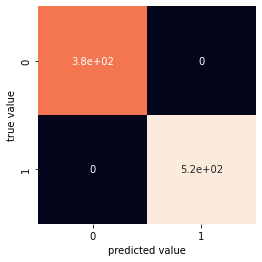

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

mat = confusion_matrix(y_test,y_predict)    #  分類結果
sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

In [15]:
mat    #  對照上圖數字

array([[375,   0],
       [  0, 525]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
target_names = ['下跌', '上漲']
print(classification_report(y_test, y_predict, target_names=target_names))    #  分類報告

              precision    recall  f1-score   support

          下跌       1.00      1.00      1.00       375
          上漲       1.00      1.00      1.00       525

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### ( 2 ) 陽明

In [2]:
import pandas as pd
tw2609 = pd.read_csv('tw2609_5d3%_raw_ckip.csv', encoding = 'utf-8')    #  讀檔

In [3]:
tw2609

,Unnamed: 0,post_time,title,content,tokenized,label
0,0,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,"['[', '其他', '] 108/01/02 ', '加權', '股價', '指數', ...",False
1,1,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,"['[', '其他', '] 108/01/03 ', '加權', '股價', '指數', ...",False
2,2,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,"['[', '其他', ']', ' 108/01/04 ', '加權', '股價', '指...",False
3,3,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,"['[', '其他', '] 108/01/07', ' ', '加權', '股價', '指...",False
4,4,2019-01-08,[其他] 108/01/08 加權股價指數成分股暨市值比重,昨天有人問了個老問題@@ 這個資料要怎麼用 欸豆捏...阿就是算加權指數阿XDDD 不...,"['[', '其他', ']', ' 108/01/08', ' ', '加權', '股價'...",False
...,...,...,...,...,...,...
4123,4123,2021-12-30,[新聞] 陽明員工「望長榮興嘆」 年終最高才領8,原文標題：陽明員工「望長榮興嘆」 年終最高才領8個月：爛透了！ (請勿刪...,"['[', '新聞', ']', ' ', '陽明', '員工', '「', '望', '長...",False
4124,4124,2021-12-30,[新聞] 外資2021年買超前10大股票 最愛中信金,原文標題：外資2021年買超前10大股票！ 最愛中信金狂買251億元 ...,"['[', '新聞', '] ', '外資', '2021年', '買超', '前', '1...",False
4125,4125,2021-12-30,[新聞] 貨櫃三雄拚年終 陽明大紅包上看30個月,原文標題： 貨櫃三雄拚年終 陽明大紅包上看30個月 原文連結： https://ctee....,"['[', '新聞', ']', ' ', '貨櫃', '三雄', '拚', '年終', '...",False
4126,4126,2021-12-30,[情報] 1230八大公股銀行買賣超排行,手機介面圖片好讀版： 以下資訊依張數排列 買超 ...,"['[', '情報', ']', ' 1230八', '大公股', '銀行', '買賣', ...",False


In [4]:
df = tw2609.drop(tw2609[tw2609.label == 'False'].index)    #  刪除"平(False)"的資料
df.reset_index(inplace=True, drop=True)

In [5]:
df

,Unnamed: 0,post_time,title,content,tokenized,label
0,6,2019-01-10,[其他] 108/01/10 加權股價指數成分股暨市值比重,高低差40點 超級死魚盤XDD 但我的持股怎麼跌了，嗚嗚嗚QQ 是說最近採樣股都沒啥變...,"['[', '其他', '] 108/01/10', ' ', '加權', '股價', '指...",漲
1,21,2019-05-17,[其他] 5/17 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 1102 ...,"['[', '其他', '] 5/17 ', '台灣', '集中', '市場', '外資',...",跌
2,28,2019-07-04,[新聞]慧洋上半年稅前盈餘翻倍,1.原文連結： https://reurl.cc/4VboK 2.原文內容： （中央社記者...,"['[', '新聞', ']', '慧洋', '上', '半', '年', '稅前盈餘', ...",漲
3,29,2019-07-05,[標的] 非擔任主管職務之全時員工薪資,整理好的原始資料 https://reurl.cc/oEKqg PERCENTRANK ...,"['[', '標的', '] ', '非', '擔任', '主管', '職務', '之', ...",漲
4,30,2019-07-19,[新聞] 散裝航運族群 逆勢前行,散裝航運族群 逆勢前行 04:092019/07/19 工商時報 方歆婷 https:/...,"['[', '新聞', ']', ' ', '散裝', '航運', '族群', ' ', '...",漲
...,...,...,...,...,...,...
3403,4052,2021-12-17,[情報] 1217上市投信買賣超排行,圖片好讀版： 買超 ...,"['[', '情報', ']', ' 1217', '上市', '投信', '買賣', '超...",跌
3404,4053,2021-12-17,[新聞] 運價全都漲 航運股有機會再起？他指出2大,原文標題：運價全都漲 航運股有機會再起？他指出2大關鍵 原文連結：https://reurl...,"['[', '新聞', ']', ' ', '運價', '全', '都', '漲', ' '...",跌
3405,4054,2021-12-17,[情報] 1217 上市櫃外資投信買超金額排行,外資 排行 股票名稱 百萬 收盤價 漲跌 1 2330台積電 ...,"['[', '情報', ']', ' 1217 ', '上市櫃', '外資', '投信', ...",跌
3406,4055,2021-12-17,[情報] 110年12月17日信用交易統計,1. 標題：110年12月17日信用交易統計 2. 來源：臺灣證券交易所、證券櫃檯買賣中心 ...,"['[', '情報', ']', ' 110年', '12月', '17日', '信用', ...",跌


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
vectorizer = TfidfVectorizer()    #  tf-idf
Train = vectorizer.fit_transform(df['tokenized'].values.astype('U'))
Train_DF = pd.DataFrame(Train.toarray(),columns=vectorizer.get_feature_names())

In [8]:
Train_DF

,00,000,0000001,0003,000teu,000仟元,000億,000元,000多點,000張,...,ｑ1,ｑ１,ｓｌ,ｔｅｕ,ｘｄｄ,ｘｘ,ｘｘ坪,ｘｘ小段,ｘｘ平方公尺,ｘｘ段
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070040,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3404,0.044906,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3405,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3406,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
label = pd.DataFrame(df['label'])    #  只留tf-idf和label
tfidf_DF = pd.concat([Train_DF, label], axis=1)

In [10]:
tfidf_DF.loc[tfidf_DF['label']=="漲"] = 1    #  將"漲"設成1，"跌"設成0
tfidf_DF.loc[tfidf_DF['label']=="跌"] = 0

In [11]:
tfidf_DF

,00,000,0000001,0003,000teu,000仟元,000億,000元,000多點,000張,...,ｑ１,ｓｌ,ｔｅｕ,ｘｄｄ,ｘｘ,ｘｘ坪,ｘｘ小段,ｘｘ平方公尺,ｘｘ段,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
X = tfidf_DF.drop(['label'], axis = 1)
y = tfidf_DF['label'].astype('int')

chi2_selector = SelectKBest(chi2, k = 2000)    #  篩選2000個特徵值(卡方)
chi2_selector.fit(X, y)
kbest_vocabs = X.columns[chi2_selector.get_support()]
X = X[kbest_vocabs]

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)    #  拆成80%訓練和20%測試資料

In [14]:
from sklearn import svm

Model=svm.SVC(kernel='rbf', gamma=.3)    #  用SVM模型進行分類
Model.fit(X_train, y_train)
y_predict=Model.predict(X_test)

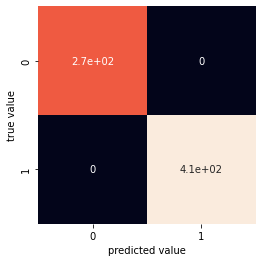

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

mat = confusion_matrix(y_test,y_predict)    #  分類結果
sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

In [16]:
mat    #  對照上圖數字

array([[270,   0],
       [  0, 412]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
target_names = ['下跌', '上漲']
print(classification_report(y_test, y_predict, target_names=target_names))    #  分類報告

              precision    recall  f1-score   support

          下跌       1.00      1.00      1.00       270
          上漲       1.00      1.00      1.00       412

    accuracy                           1.00       682
   macro avg       1.00      1.00      1.00       682
weighted avg       1.00      1.00      1.00       682



### ( 3 ) 萬海

In [1]:
import pandas as pd
tw2615 = pd.read_csv('tw2615_5d3%_raw_ckip.csv', encoding = 'utf-8')    #  讀檔

In [2]:
tw2615

,Unnamed: 0,post_time,title,content,tokenized,label
0,0,2019-01-02,[其他] 108/01/02 加權股價指數成分股暨市值比重,大家新年快樂～ 雖然今天大盤有點糟就是了= = 然後我因為空手限制，期貨什麼空單都沒有=...,"['[', '其他', '] 108/01/02 ', '加權', '股價', '指數', ...",False
1,1,2019-01-03,[其他] 108/01/03 加權股價指數成分股暨市值比重,慘 拉高又殺低 到底今年怎麼走呢？ 經過了一天，資料應該是準的了 但還是一樣 以下...,"['[', '其他', '] 108/01/03 ', '加權', '股價', '指數', ...",False
2,2,2019-01-04,[其他] 108/01/04 加權股價指數成分股暨市值比重,2014搞得我心情很差ˊˇˋ 今天的大盤真的是狠狠修正電子股ˊˇˋ 不過說起來 總是有...,"['[', '其他', ']', ' 108/01/04 ', '加權', '股價', '指...",False
3,3,2019-01-07,[其他] 108/01/07 加權股價指數成分股暨市值比重,嘩啦嘩啦 大盤就漲200點了@@ 太神啦@@ 然而重點是 你的持股漲了嗎?我是還在山...,"['[', '其他', '] 108/01/07', ' ', '加權', '股價', '指...",False
4,4,2019-01-08,[其他] 108/01/08 加權股價指數成分股暨市值比重,昨天有人問了個老問題@@ 這個資料要怎麼用 欸豆捏...阿就是算加權指數阿XDDD 不...,"['[', '其他', ']', ' 108/01/08', ' ', '加權', '股價'...",False
...,...,...,...,...,...,...
2565,2565,2021-12-30,[情報] 1230上市投信買賣超排行,圖片好讀版： 買超 ...,"['[', '情報', ']', ' 1230', '上市', '投信', '買賣', '超...",False
2566,2566,2021-12-30,Re: [新聞] 獨／超爽！長榮海運年終獎金落袋 狂撒40,我本身是長榮的股東，也是一般的上班族，看到長榮直接發40個月，我整個很開心 完全沒有負面的想...,"['Re: ', '[', '新聞', ']', ' ', '獨', '／', '超', '...",False
2567,2567,2021-12-30,[新聞] 長榮海運多數員工都領到40個月 陽明加紅,原文標題：長榮海運多數員工都領到40個月 陽明加紅利最高可發到33.6個月 原文連結：ht...,"['[', '新聞', ']', ' ', '長榮', '海運', '多數', '員工', ...",False
2568,2568,2021-12-30,[情報] 1230上市外資買賣超排行,圖片好讀版： 買超 ...,"['[', '情報', ']', ' 1230', '上市', '外資', '買賣', '超...",False


In [3]:
df = tw2615.drop(tw2615[tw2615.label == 'False'].index)    #  刪除"平(False)"的資料
df.reset_index(inplace=True, drop=True)

In [4]:
df

,Unnamed: 0,post_time,title,content,tokenized,label
0,17,2019-05-15,[新聞] 「殯葬大亨」龍巖賣樓大進補 貢獻EPS估,1.原文連結： http://bit.ly/2WIAUIc 2.原文內容： 「殯葬大...,"['[', '新聞', ']', ' ', '「', '殯葬', '大亨', '」', '龍...",漲
1,18,2019-05-21,[其他] 108年05月21日外資買賣超個股排行,5月21日外資買超超過1000張個股排行統計 代號 名稱 成交 買超 ...,"['[', '其他', '] 108年', '05月', '21日', '外資', '買賣超...",漲
2,20,2019-05-28,[其他] 5/28 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 00637L...,"['[', '其他', '] 5/28', ' ', '台灣', '集中', '市場', '...",漲
3,21,2019-05-29,[新聞] 任正非真成「獨狼」？傳4萬海外員工拒絕,1.原文連結： https://www.ntdtv.com/b5/2019/05/29/a...,"['[', '新聞', ']', ' ', '任正非', '真', '成', '「', '獨...",漲
4,24,2019-07-02,[其他] 7/2 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 2313 ...,"['[', '其他', '] 7/2 ', '台灣', '集中', '市場', '外資', ...",漲
...,...,...,...,...,...,...
2017,2529,2021-12-22,[新聞] 富邦特選高股息ETF高人氣 掛牌首日爆,---------------------------------- 原文標題：富邦特選高...,"['[', '新聞', '] ', '富邦特選', '高', '股息', 'ETF', '高...",漲
2018,2530,2021-12-22,[情報] 1222八大公股銀行買賣超排行,手機介面圖片好讀版： 以下資訊依張數排列 買超 ...,"['[', '情報', ']', ' 1222', '八', '大', '公股', '銀行'...",漲
2019,2531,2021-12-22,Re: [請益] 撿股票tick穩賺為什麼不流行？,真的很聰明，股市聖杯被你找到了 目前可能還沒有人跟你一樣想到這個方法 但是 沖長榮、沖...,"['Re: ', '[', '請益', ']', ' ', '撿', '股票', 'tick...",漲
2020,2532,2021-12-22,[情報] 110年12月22日信用交易統計,1. 標題：110年12月22日信用交易統計 2. 來源：臺灣證券交易所、證券櫃檯買賣中心 ...,"['[', '情報', ']', ' 110年', '12月', '22日', '信用', ...",漲


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
vectorizer = TfidfVectorizer()    #  tf-idf
Train = vectorizer.fit_transform(df['tokenized'].values.astype('U'))
Train_DF = pd.DataFrame(Train.toarray(),columns=vectorizer.get_feature_names())

In [7]:
Train_DF

,00,000,000teu,000億,000元,000只櫃,000多,000多點,000美,000美元,...,ｐｓ,ｑ1,ｑ１,ｓｌ,ｘｘ,ｘｘ坪,ｘｘ小段,ｘｘ平方公尺,ｘｘ段,ｘｘ段ｘｘ
0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.511572,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.037557,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.076059,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
label = pd.DataFrame(df['label'])    #  只留tf-idf和label
tfidf_DF = pd.concat([Train_DF, label], axis=1)

In [9]:
tfidf_DF.loc[tfidf_DF['label']=="漲"] = 1    #  將"漲"設成1，"跌"設成0
tfidf_DF.loc[tfidf_DF['label']=="跌"] = 0

In [10]:
tfidf_DF

,00,000,000teu,000億,000元,000只櫃,000多,000多點,000美,000美元,...,ｑ1,ｑ１,ｓｌ,ｘｘ,ｘｘ坪,ｘｘ小段,ｘｘ平方公尺,ｘｘ段,ｘｘ段ｘｘ,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2020,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [11]:
X = tfidf_DF.drop(['label'], axis = 1)
y = tfidf_DF['label'].astype('int')

chi2_selector = SelectKBest(chi2, k = 2000)    #  篩選2000個特徵值(卡方)
chi2_selector.fit(X, y)
kbest_vocabs = X.columns[chi2_selector.get_support()]
X = X[kbest_vocabs]

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=0)    #  拆成80%訓練和20%測試資料

In [13]:
from sklearn import svm

Model=svm.SVC(kernel='rbf', gamma=.3)    #  用SVM模型進行分類
Model.fit(X_train, y_train)
y_predict=Model.predict(X_test)

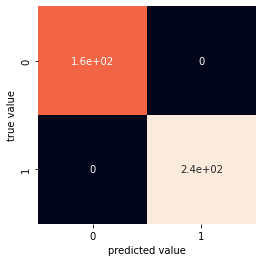

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

mat = confusion_matrix(y_test,y_predict)    #  分類結果
sns.heatmap(mat,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

In [15]:
mat    #  對照上圖數字

array([[163,   0],
       [  0, 242]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
target_names = ['下跌', '上漲']
print(classification_report(y_test, y_predict, target_names=target_names))    #  分類報告

              precision    recall  f1-score   support

          下跌       1.00      1.00      1.00       163
          上漲       1.00      1.00      1.00       242

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



---------------

## Requirement 3

In [2]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import monpa
from monpa import utils
import re
import datetime

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [4]:
stock_2019 = pd.read_excel(r'D:/大三下/大數據與商業分析/期中/stock_data_2019-2021.xlsx', sheet_name = '上市2019')
stock_2020 = pd.read_excel(r'D:/大三下/大數據與商業分析/期中/stock_data_2019-2021.xlsx', sheet_name = '上市2020')
stock_2021 = pd.read_excel(r'D:/大三下/大數據與商業分析/期中/stock_data_2019-2021.xlsx', sheet_name = '上市2021')

In [5]:
stock = pd.concat([stock_2019, stock_2020, stock_2021])

In [6]:
month = pd.read_excel(r'D:/大三下/大數據與商業分析/期中/month.xlsx')
month.head()

,Start,End
0,2019/1/1,2019/1/31
1,2019/2/1,2019/2/28
2,2019/3/1,2019/3/31
3,2019/4/1,2019/4/30
4,2019/5/1,2019/5/31


In [7]:
# 這個function用來將字串以正則化處理去除中文字元以外的字元
def clearSentence(sentence):
    return re.sub(r'[^\u4e00-\u9fa5]+', '', sentence)

# 我們從stopwords_zh.txt這個檔案中匯入繁體中文的停用詞
with open(r'D:/大三下/大數據與商業分析/期中/stopwords_zh.txt', 'r', newline='', encoding='utf-8') as file:
    stopwords = file.read().splitlines() 
file.close()

### ( 1 ) 長榮

#### 讀檔

In [38]:
cr_raw = pd.read_csv('D:/大三下/大數據與商業分析/期中/tw2603_5d3%_raw_ckip.csv')
mixfile = cr_raw.drop(cr_raw[cr_raw.label == 'False'].index)
mixfile.reset_index(inplace=True, drop=True)
mixfile.head()

,Unnamed: 0,post_time,title,content,tokenized,label
0,7,2019-01-10,[其他] 108/01/10 加權股價指數成分股暨市值比重,高低差40點 超級死魚盤XDD 但我的持股怎麼跌了，嗚嗚嗚QQ 是說最近採樣股都沒啥變...,"['[', '其他', '] 108/01/10', ' ', '加權', '股價', '指...",漲
1,8,2019-01-10,[其他] 1/10 台灣集中市場三大法人買賣超前30名,1/10 台灣集中市場三大法人買賣超前30名 買超 代碼 名稱 ...,"['[', '其他', '] 1/10', ' ', '台灣', '集中', '市場', '...",漲
2,54,2019-04-16,[其他] 4/16外資連續買超天數排行榜,代號 名稱 成交價 連續買超 累積買超 ...,"['[', '其他', '] 4/16', '外資', '連續', '買超', '天數', ...",漲
3,55,2019-04-16,[其他] 4/16 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 2448 ...,"['[', '其他', '] 4/16 ', '台灣', '集中', '市場', '外資',...",漲
4,56,2019-04-18,[新聞] 五大爭議擺不平 長榮空姐釀罷工,https://udn.com/news/story/7241/3761771 長榮航空與...,"['[', '新聞', ']', ' ', '五', '大', '爭議', '擺', '不'...",漲


#### 移動回測

n = 5 <br>
$\sigma$ = 3% <br>
model = SVM <br>

In [60]:
all_buyrate_label = pd.Series()
all_accuracy_predict_label = pd.Series()
all_accuracy_test_label = pd.Series()

time_range = len(month)
for t in range(time_range - 6):
    
    cr = stock[stock['證券代碼'].str.contains('2603')]
    cr['年月日'] = pd.to_datetime(cr['年月日']).dt.date
    cr = cr.sort_values(by = '年月日').reset_index(drop = True)
    
    cr = cr[['證券代碼', '年月日', '收盤價(元)']]
    cr['單日漲跌幅(%)'] = cr['收盤價(元)'].rolling(window = 5).apply(lambda x: (x.iloc[4] - x.iloc[0]) / x.iloc[0])
    cr['label'] = cr['單日漲跌幅(%)'].apply(lambda x: (x > 0.03 and '漲') or (x < - 0.03 and '跌'))
    
    # 【訓練集文章向量化處理】

    # 設定訓練、測試資料集的開始日期與結束日期
    train_startDate = pd.to_datetime(month['Start'][t]) #month['Start'][0] #month['Start'][0]
    train_endDate = pd.to_datetime(month['End'][t+5]) #month['End'][2]
    
    test_startDate = pd.to_datetime(month['Start'][t+6])
    test_endDate = pd.to_datetime(month['End'][t+6])

    # 我們想嘗試用每六個月的文章資料來訓練一個分類器，並用於下個月的股價變動預測當中

    # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
    train_tokenStr_list = []

    for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)].index):
        train_tokenStr_list.append(mixfile['tokenized'][i])
        
    # 文章向量化處理：我們透過sklearn套件中TfidfVectorizer將斷詞結果去除停用詞後轉為空間向量    

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

    vectorizer = TfidfVectorizer(stop_words=stopwords)
    
    # 若當月無漲跌文章資料略過本月預測
    try:
        X_train = vectorizer.fit_transform(train_tokenStr_list)
        X_train = pd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names())
        #display(X_train)

        # - 可以看到使用全部的斷詞結果去組成空間向量時稀疏性會非常大，在後續預測時效率會很低
        # - 因此我們需要選擇對分類結果有較顯著影響的詞彙作為向量空間的維度
        # - 以下我們透過Chi-square計算各詞彙與漲跌標籤的獨立性作為選擇向量空間維度的依據。

        y_train = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)]['label']

        chi2_selector = SelectKBest(chi2, k = 2000)
        chi2_selector.fit(X_train, y_train)
        kbest_vocabs = X_train.columns[chi2_selector.get_support()]
        X_train = X_train[kbest_vocabs]

        # 【測試集文章向量化處理】

        # 接著我們可以透過每六個月的向量維度將下個月的文章也轉成tf-idf的向量空間

        # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
        test_tokenStr_list = []

        for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)].index):
            test_tokenStr_list.append(mixfile['tokenized'][i])

        if(len(test_tokenStr_list) == 0):
            test_tokenStr_list = ['股票']

        # 接著將4月份的結果透過df.reindex這個方法映射到訓練集的向量空間中
        Y_test = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        vectorizer = TfidfVectorizer(stop_words=stopwords)
        X_test = vectorizer.fit_transform(test_tokenStr_list)
        X_test = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names())
        X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)

        # 將漲跌標籤以數字表示
        lis = []
        for i in y_train:
            if i == '漲':
                lis.append(1)
            elif i == '跌':
                lis.append(-1)
        Y_train = pd.Series(lis)

        # 【建立預測模型】

        # 使用SVM模型演算法
        from sklearn.svm import SVC
        cla = SVC(kernel='linear')
        cla.fit(X_train, Y_train) 
        cla.score(X_train, Y_train)

        # 【檢視預測結果】
        test_data = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]
        test_data['predict_label'] = cla.predict(X_test)

        for d in cr[pd.to_datetime(cr['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['年月日']:
            if str(d) not in list(set(test_data['post_time'])):
                cr.drop(cr[cr['年月日']==d].index, inplace=True)

        test_label = cr[pd.to_datetime(cr['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        # 將漲跌標籤以數字表示
        llis = []
        for i in test_label:
            if i == '漲':
                llis.append(1)
            elif i == '跌':
                llis.append(-1)
        Test_label = pd.Series(llis)

        # 紀錄預測漲跌標籤
        predict_label = test_data.groupby(['post_time', 'predict_label']).count().sort_values('label', ascending = False).sort_index(level=[0], sort_remaining=False).groupby(level=0).head(1).reset_index()['predict_label']

        # 將預測漲跌篇數過於接近的標示為不出手
        test_data['up_label'] = test_data['predict_label'] == 1
        test_data['down_label'] = test_data['predict_label'] == -1
        test_data['up_label'] = test_data['up_label'].astype(int)
        test_data['down_label'] = test_data['down_label'].astype(int)

        predict_label_new = test_data.groupby(['post_time']).sum()

        buy = 0

        for i in range(len(predict_label_new)):
            if (predict_label_new['up_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = 1
            elif (predict_label_new['down_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = -1     
            else:
                predict_label[i] = 0

        all_buyrate_label = all_buyrate_label.append(predict_label, ignore_index = True)#, ignore_index = True

        # 計算出手率
        buycnt = 0

        for i in range(len(predict_label)):
            if (predict_label[i] != 0):
                buycnt += 1
        if(len(predict_label) == 0):
            buyrate = 0
        else:
            buyrate = buycnt/len(predict_label)
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('出手率 :', buyrate)

        # 移除判斷為不出手的欄位
        for i in range(len(predict_label)):
            if (predict_label[i] == 0):
                predict_label.drop(i, inplace = True)
                Test_label.drop(i, inplace = True)

        all_accuracy_predict_label = all_accuracy_predict_label.append(predict_label, ignore_index = True)
        all_accuracy_test_label = all_accuracy_test_label.append(Test_label, ignore_index = True)

        # 計算準確率
        from sklearn.metrics import accuracy_score
        print('預測準確率 :', accuracy_score(Test_label, predict_label))

        from sklearn.metrics import confusion_matrix

        mat = confusion_matrix(Test_label, predict_label)
        print('confusion_matrix :\n', mat, '\n')
        
    except:
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('NO train data\n')
        continue

2019年 7月份
出手率 : 1.0
預測準確率 : 1.0
confusion_matrix :
 [[6]] 

2019年 8月份
出手率 : 1.0
預測準確率 : 0.14285714285714285
confusion_matrix :
 [[0 6]
 [0 1]] 

2019年 9月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 10月份
出手率 : 1.0
預測準確率 : 0.6
confusion_matrix :
 [[0 2]
 [0 3]] 

2019年 11月份
出手率 : 1.0
預測準確率 : 0.6666666666666666
confusion_matrix :
 [[0 1]
 [0 2]] 

2019年 12月份
出手率 : 1.0
預測準確率 : 1.0
confusion_matrix :
 [[1]] 

2020年 1月份
出手率 : 1.0
預測準確率 : 0.0
confusion_matrix :
 [[0 2]
 [0 0]] 

2020年 2月份
出手率 : 1.0
預測準確率 : 1.0
confusion_matrix :
 [[1]] 

2020年 3月份
出手率 : 0.8571428571428571
預測準確率 : 0.6666666666666666
confusion_matrix :
 [[4 2]
 [0 0]] 

2020年 4月份
出手率 : 1.0
預測準確率 : 0.2222222222222222
confusion_matrix :
 [[2 0]
 [7 0]] 

2020年 5月份
出手率 : 1.0
預測準確率 : 0.0
confusion_matrix :
 [[0 0]
 [1 0]] 

2020年 6月份
出手率 : 1.0
預測準確率 : 0.0
confusion_matrix :
 [[0 1]
 [2 0]] 

2020年 7月份
出手率 : 0.8333333333333334
預測準確率 : 0.4
confusion_matrix :
 [[2 0]
 [3 0]] 

2020年 8月份
出手率 : 0.9166666666666666
預測準確率 : 0.90909

In [61]:
# 計算總出手率
all_buycnt = 0

for i in range(len(all_buyrate_label)):
    if (all_buyrate_label[i] != 0):
        all_buycnt += 1

all_buyrate = all_buycnt/len(all_buyrate_label)
print('總出手率 :', all_buyrate)

總出手率 : 0.9469964664310954


In [62]:
# 計算總準確率

from sklearn.metrics import accuracy_score
print('總預測準確率 :', accuracy_score(all_accuracy_test_label, all_accuracy_predict_label))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(all_accuracy_test_label, all_accuracy_predict_label)
print('confusion_matrix :\n', mat)
print('\n')

總預測準確率 : 0.6492537313432836
confusion_matrix :
 [[ 11  79]
 [ 15 163]]




### ( 2 ) 陽明

#### 讀檔

In [10]:
ym_raw = pd.read_csv('D:/大三下/大數據與商業分析/期中/tw2609_5d3%_raw_ckip.csv')
mixfile = ym_raw.drop(ym_raw[ym_raw.label == 'False'].index)
mixfile.reset_index(inplace=True, drop=True)
mixfile.head()

,Unnamed: 0,post_time,title,content,tokenized,label
0,6,2019-01-10,[其他] 108/01/10 加權股價指數成分股暨市值比重,高低差40點 超級死魚盤XDD 但我的持股怎麼跌了，嗚嗚嗚QQ 是說最近採樣股都沒啥變...,"['[', '其他', '] 108/01/10', ' ', '加權', '股價', '指...",漲
1,21,2019-05-17,[其他] 5/17 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 1102 ...,"['[', '其他', '] 5/17 ', '台灣', '集中', '市場', '外資',...",跌
2,28,2019-07-04,[新聞]慧洋上半年稅前盈餘翻倍,1.原文連結： https://reurl.cc/4VboK 2.原文內容： （中央社記者...,"['[', '新聞', ']', '慧洋', '上', '半', '年', '稅前盈餘', ...",漲
3,29,2019-07-05,[標的] 非擔任主管職務之全時員工薪資,整理好的原始資料 https://reurl.cc/oEKqg PERCENTRANK ...,"['[', '標的', '] ', '非', '擔任', '主管', '職務', '之', ...",漲
4,30,2019-07-19,[新聞] 散裝航運族群 逆勢前行,散裝航運族群 逆勢前行 04:092019/07/19 工商時報 方歆婷 https:/...,"['[', '新聞', ']', ' ', '散裝', '航運', '族群', ' ', '...",漲


#### 移動回測

n = 5 <br>
$\sigma$ = 3% <br>
model = SVM <br>

In [11]:
all_buyrate_label = pd.Series()
all_accuracy_predict_label = pd.Series()
all_accuracy_test_label = pd.Series()

time_range = len(month)
for t in range(time_range - 6):
    
    ym = stock[stock['證券代碼'].str.contains('2609')]
    ym['年月日'] = pd.to_datetime(ym['年月日']).dt.date
    ym = ym.sort_values(by = '年月日').reset_index(drop = True)
    
    ym = ym[['證券代碼', '年月日', '收盤價(元)']]
    ym['單日漲跌幅(%)'] = ym['收盤價(元)'].rolling(window = 5).apply(lambda x: (x.iloc[4] - x.iloc[0]) / x.iloc[0])
    ym['label'] = ym['單日漲跌幅(%)'].apply(lambda x: (x > 0.03 and '漲') or (x < - 0.03 and '跌'))
    
    # 【訓練集文章向量化處理】

    # 設定訓練、測試資料集的開始日期與結束日期
    train_startDate = pd.to_datetime(month['Start'][t]) #month['Start'][0] #month['Start'][0]
    train_endDate = pd.to_datetime(month['End'][t+5]) #month['End'][2]
    
    test_startDate = pd.to_datetime(month['Start'][t+6])
    test_endDate = pd.to_datetime(month['End'][t+6])

    # 我們想嘗試用每六個月的文章資料來訓練一個分類器，並用於下個月的股價變動預測當中

    # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
    train_tokenStr_list = []

    for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)].index):
        train_tokenStr_list.append(mixfile['tokenized'][i])
        
    # 文章向量化處理：我們透過sklearn套件中TfidfVectorizer將斷詞結果去除停用詞後轉為空間向量    

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

    vectorizer = TfidfVectorizer(stop_words=stopwords)
    
    # 若當月無漲跌文章資料略過本月預測
    try:
        X_train = vectorizer.fit_transform(train_tokenStr_list)
        X_train = pd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names())
        #display(X_train)

        # - 可以看到使用全部的斷詞結果去組成空間向量時稀疏性會非常大，在後續預測時效率會很低
        # - 因此我們需要選擇對分類結果有較顯著影響的詞彙作為向量空間的維度
        # - 以下我們透過Chi-square計算各詞彙與漲跌標籤的獨立性作為選擇向量空間維度的依據。

        y_train = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)]['label']

        chi2_selector = SelectKBest(chi2, k = 2000)
        chi2_selector.fit(X_train, y_train)
        kbest_vocabs = X_train.columns[chi2_selector.get_support()]
        X_train = X_train[kbest_vocabs]

        # 【測試集文章向量化處理】

        # 接著我們可以透過每六個月的向量維度將下個月的文章也轉成tf-idf的向量空間

        # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
        test_tokenStr_list = []

        for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)].index):
            test_tokenStr_list.append(mixfile['tokenized'][i])

        if(len(test_tokenStr_list) == 0):
            test_tokenStr_list = ['股票']

        # 接著將4月份的結果透過df.reindex這個方法映射到訓練集的向量空間中
        Y_test = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        vectorizer = TfidfVectorizer(stop_words=stopwords)
        X_test = vectorizer.fit_transform(test_tokenStr_list)
        X_test = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names())
        X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)

        # 將漲跌標籤以數字表示
        lis = []
        for i in y_train:
            if i == '漲':
                lis.append(1)
            elif i == '跌':
                lis.append(-1)
        Y_train = pd.Series(lis)

        # 【建立預測模型】

        # 使用SVM模型演算法
        from sklearn.svm import SVC
        cla = SVC(kernel='linear')
        cla.fit(X_train, Y_train) 
        cla.score(X_train, Y_train)

        # 【檢視預測結果】
        test_data = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]
        test_data['predict_label'] = cla.predict(X_test)

        for d in ym[pd.to_datetime(ym['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['年月日']:
            if str(d) not in list(set(test_data['post_time'])):
                ym.drop(ym[ym['年月日']==d].index, inplace=True)

        test_label = ym[pd.to_datetime(ym['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        # 將漲跌標籤以數字表示
        llis = []
        for i in test_label:
            if i == '漲':
                llis.append(1)
            elif i == '跌':
                llis.append(-1)
        Test_label = pd.Series(llis)

        # 紀錄預測漲跌標籤
        predict_label = test_data.groupby(['post_time', 'predict_label']).count().sort_values('label', ascending = False).sort_index(level=[0], sort_remaining=False).groupby(level=0).head(1).reset_index()['predict_label']

        # 將預測漲跌篇數過於接近的標示為不出手
        test_data['up_label'] = test_data['predict_label'] == 1
        test_data['down_label'] = test_data['predict_label'] == -1
        test_data['up_label'] = test_data['up_label'].astype(int)
        test_data['down_label'] = test_data['down_label'].astype(int)

        predict_label_new = test_data.groupby(['post_time']).sum()

        buy = 0

        for i in range(len(predict_label_new)):
            if (predict_label_new['up_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = 1
            elif (predict_label_new['down_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = -1     
            else:
                predict_label[i] = 0

        all_buyrate_label = all_buyrate_label.append(predict_label, ignore_index = True)#, ignore_index = True

        # 計算出手率
        buycnt = 0

        for i in range(len(predict_label)):
            if (predict_label[i] != 0):
                buycnt += 1
        if(len(predict_label) == 0):
            buyrate = 0
        else:
            buyrate = buycnt/len(predict_label)
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('出手率 :', buyrate)

        # 移除判斷為不出手的欄位
        for i in range(len(predict_label)):
            if (predict_label[i] == 0):
                predict_label.drop(i, inplace = True)
                Test_label.drop(i, inplace = True)

        all_accuracy_predict_label = all_accuracy_predict_label.append(predict_label, ignore_index = True)
        all_accuracy_test_label = all_accuracy_test_label.append(Test_label, ignore_index = True)

        # 計算準確率
        from sklearn.metrics import accuracy_score
        print('預測準確率 :', accuracy_score(Test_label, predict_label))

        from sklearn.metrics import confusion_matrix

        mat = confusion_matrix(Test_label, predict_label)
        print('confusion_matrix :\n', mat, '\n')
        
    except:
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('NO train data\n')
        continue

2019年 7月份
出手率 : 1.0
預測準確率 : 1.0
confusion_matrix :
 [[3]] 

2019年 8月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 9月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 10月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 11月份
出手率 : 1.0
預測準確率 : 0.3333333333333333
confusion_matrix :
 [[0 2]
 [0 1]] 

2019年 12月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2020年 1月份
出手率 : 1.0
預測準確率 : 0.0
confusion_matrix :
 [[0 1]
 [0 0]] 

2020年 2月份
NO train data

2020年 3月份
NO train data

2020年 4月份
NO train data

2020年 5月份
NO train data

2020年 6月份
NO train data

2020年 7月份
NO train data

2020年 8月份
NO train data

2020年 9月份
NO train data

2020年 10月份
NO train data

2020年 11月份
出手率 : 1.0
預測準確率 : 0.8571428571428571
confusion_matrix :
 [[0 1]
 [0 6]] 

2020年 12月份
出手率 : 1.0
預測準確率 : 0.9444444444444444
confusion_matrix :
 [[ 0  1]
 [ 0 17]] 

2021年 1月份
出手率 : 1.0
預測準確率 : 0.2631578947368421
confusion_matrix :
 [[ 0 14]
 [ 0  5]] 

2021年 2月份
出手率 : 0.7272727272727273
預測準確率 : 1.0
confusion_matrix :
 [[8]] 

2

In [12]:
# 計算總出手率
all_buycnt = 0

for i in range(len(all_buyrate_label)):
    if (all_buyrate_label[i] != 0):
        all_buycnt += 1

all_buyrate = all_buycnt/len(all_buyrate_label)
print('總出手率 :', all_buyrate)

總出手率 : 0.9170506912442397


In [13]:
# 計算總準確率

from sklearn.metrics import accuracy_score
print('總預測準確率 :', accuracy_score(all_accuracy_test_label, all_accuracy_predict_label))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(all_accuracy_test_label, all_accuracy_predict_label)
print('confusion_matrix :\n', mat)
print('\n')

總預測準確率 : 0.6532663316582915
confusion_matrix :
 [[  2  68]
 [  1 128]]




### ( 3 ) 萬海

#### 讀檔

In [14]:
wh_raw = pd.read_csv('D:/大三下/大數據與商業分析/期中/tw2615_5d3%_raw_ckip.csv')
mixfile = wh_raw.drop(wh_raw[wh_raw.label == 'False'].index)
mixfile.reset_index(inplace=True, drop=True)
mixfile.head()

,Unnamed: 0,post_time,title,content,tokenized,label
0,17,2019-05-15,[新聞] 「殯葬大亨」龍巖賣樓大進補 貢獻EPS估,1.原文連結： http://bit.ly/2WIAUIc 2.原文內容： 「殯葬大...,"['[', '新聞', ']', ' ', '「', '殯葬', '大亨', '」', '龍...",漲
1,18,2019-05-21,[其他] 108年05月21日外資買賣超個股排行,5月21日外資買超超過1000張個股排行統計 代號 名稱 成交 買超 ...,"['[', '其他', '] 108年', '05月', '21日', '外資', '買賣超...",漲
2,20,2019-05-28,[其他] 5/28 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 00637L...,"['[', '其他', '] 5/28', ' ', '台灣', '集中', '市場', '...",漲
3,21,2019-05-29,[新聞] 任正非真成「獨狼」？傳4萬海外員工拒絕,1.原文連結： https://www.ntdtv.com/b5/2019/05/29/a...,"['[', '新聞', ']', ' ', '任正非', '真', '成', '「', '獨...",漲
4,24,2019-07-02,[其他] 7/2 台灣集中市場外資買賣超前30名,◆買超 代碼 股票名稱 買超張數 持有張數 持股率% 2313 ...,"['[', '其他', '] 7/2 ', '台灣', '集中', '市場', '外資', ...",漲


#### 移動回測

n = 5 <br>
$\sigma$ = 3% <br>
model = SVM <br>

In [15]:
all_buyrate_label = pd.Series()
all_accuracy_predict_label = pd.Series()
all_accuracy_test_label = pd.Series()

time_range = len(month)
for t in range(time_range - 6):
    
    wh = stock[stock['證券代碼'].str.contains('2615')]
    wh['年月日'] = pd.to_datetime(wh['年月日']).dt.date
    wh = wh.sort_values(by = '年月日').reset_index(drop = True)
    
    wh = wh[['證券代碼', '年月日', '收盤價(元)']]
    wh['單日漲跌幅(%)'] = wh['收盤價(元)'].rolling(window = 5).apply(lambda x: (x.iloc[4] - x.iloc[0]) / x.iloc[0])
    wh['label'] = wh['單日漲跌幅(%)'].apply(lambda x: (x > 0.03 and '漲') or (x < - 0.03 and '跌'))
    
    # 【訓練集文章向量化處理】

    # 設定訓練、測試資料集的開始日期與結束日期
    train_startDate = pd.to_datetime(month['Start'][t]) #month['Start'][0] #month['Start'][0]
    train_endDate = pd.to_datetime(month['End'][t+5]) #month['End'][2]
    
    test_startDate = pd.to_datetime(month['Start'][t+6])
    test_endDate = pd.to_datetime(month['End'][t+6])

    # 我們想嘗試用每六個月的文章資料來訓練一個分類器，並用於下個月的股價變動預測當中

    # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
    train_tokenStr_list = []

    for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)].index):
        train_tokenStr_list.append(mixfile['tokenized'][i])
        
    # 文章向量化處理：我們透過sklearn套件中TfidfVectorizer將斷詞結果去除停用詞後轉為空間向量    

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

    vectorizer = TfidfVectorizer(stop_words=stopwords)
    
    # 若當月無漲跌文章資料略過本月預測
    try:
        X_train = vectorizer.fit_transform(train_tokenStr_list)
        X_train = pd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names())
        #display(X_train)

        # - 可以看到使用全部的斷詞結果去組成空間向量時稀疏性會非常大，在後續預測時效率會很低
        # - 因此我們需要選擇對分類結果有較顯著影響的詞彙作為向量空間的維度
        # - 以下我們透過Chi-square計算各詞彙與漲跌標籤的獨立性作為選擇向量空間維度的依據。

        y_train = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(train_startDate, train_endDate)]['label']

        chi2_selector = SelectKBest(chi2, k = 2000)
        chi2_selector.fit(X_train, y_train)
        kbest_vocabs = X_train.columns[chi2_selector.get_support()]
        X_train = X_train[kbest_vocabs]

        # 【測試集文章向量化處理】

        # 接著我們可以透過每六個月的向量維度將下個月的文章也轉成tf-idf的向量空間

        # 透過monpa對文章進行斷詞處理，並將個別斷詞結果寫在tokenStr這個字串變數中，最後再將訓練集中所有字串存在tokenStr_list中
        test_tokenStr_list = []

        for i in list(mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)].index):
            test_tokenStr_list.append(mixfile['tokenized'][i])

        if(len(test_tokenStr_list) == 0):
            test_tokenStr_list = ['股票']

        # 接著將4月份的結果透過df.reindex這個方法映射到訓練集的向量空間中
        Y_test = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        vectorizer = TfidfVectorizer(stop_words=stopwords)
        X_test = vectorizer.fit_transform(test_tokenStr_list)
        X_test = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names())
        X_test = X_test.reindex(kbest_vocabs, axis=1, fill_value=0)

        # 將漲跌標籤以數字表示
        lis = []
        for i in y_train:
            if i == '漲':
                lis.append(1)
            elif i == '跌':
                lis.append(-1)
        Y_train = pd.Series(lis)

        # 【建立預測模型】

        # 使用SVM模型演算法
        from sklearn.svm import SVC
        cla = SVC(kernel='linear')
        cla.fit(X_train, Y_train) 
        cla.score(X_train, Y_train)

        # 【檢視預測結果】
        test_data = mixfile[pd.to_datetime(mixfile['post_time'], format='%Y/%m/%d').between(test_startDate, test_endDate)]
        test_data['predict_label'] = cla.predict(X_test)

        for d in wh[pd.to_datetime(wh['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['年月日']:
            if str(d) not in list(set(test_data['post_time'])):
                wh.drop(wh[wh['年月日']==d].index, inplace=True)

        test_label = wh[pd.to_datetime(wh['年月日'], format='%Y/%m/%d').between(test_startDate, test_endDate)]['label']

        # 將漲跌標籤以數字表示
        llis = []
        for i in test_label:
            if i == '漲':
                llis.append(1)
            elif i == '跌':
                llis.append(-1)
        Test_label = pd.Series(llis)

        # 紀錄預測漲跌標籤
        predict_label = test_data.groupby(['post_time', 'predict_label']).count().sort_values('label', ascending = False).sort_index(level=[0], sort_remaining=False).groupby(level=0).head(1).reset_index()['predict_label']

        # 將預測漲跌篇數過於接近的標示為不出手
        test_data['up_label'] = test_data['predict_label'] == 1
        test_data['down_label'] = test_data['predict_label'] == -1
        test_data['up_label'] = test_data['up_label'].astype(int)
        test_data['down_label'] = test_data['down_label'].astype(int)

        predict_label_new = test_data.groupby(['post_time']).sum()

        buy = 0

        for i in range(len(predict_label_new)):
            if (predict_label_new['up_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = 1
            elif (predict_label_new['down_label'][i] / (predict_label_new['up_label'][i] + predict_label_new['down_label'][i]) > 0.6):
                buy = -1     
            else:
                predict_label[i] = 0

        all_buyrate_label = all_buyrate_label.append(predict_label, ignore_index = True)#, ignore_index = True

        # 計算出手率
        buycnt = 0

        for i in range(len(predict_label)):
            if (predict_label[i] != 0):
                buycnt += 1
        if(len(predict_label) == 0):
            buyrate = 0
        else:
            buyrate = buycnt/len(predict_label)
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('出手率 :', buyrate)

        # 移除判斷為不出手的欄位
        for i in range(len(predict_label)):
            if (predict_label[i] == 0):
                predict_label.drop(i, inplace = True)
                Test_label.drop(i, inplace = True)

        all_accuracy_predict_label = all_accuracy_predict_label.append(predict_label, ignore_index = True)
        all_accuracy_test_label = all_accuracy_test_label.append(Test_label, ignore_index = True)

        # 計算準確率
        from sklearn.metrics import accuracy_score
        print('預測準確率 :', accuracy_score(Test_label, predict_label))

        from sklearn.metrics import confusion_matrix

        mat = confusion_matrix(Test_label, predict_label)
        print('confusion_matrix :\n', mat, '\n')
        
    except:
        print('{}年'.format(test_startDate.year), '{}月份'.format(test_startDate.month))
        print('NO train data\n')
        continue

2019年 7月份
NO train data

2019年 8月份
NO train data

2019年 9月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 10月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 11月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2019年 12月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2020年 1月份
出手率 : 0
預測準確率 : nan
confusion_matrix :
 [] 

2020年 2月份
NO train data

2020年 3月份
NO train data

2020年 4月份
NO train data

2020年 5月份
NO train data

2020年 6月份
NO train data

2020年 7月份
NO train data

2020年 8月份
NO train data

2020年 9月份
NO train data

2020年 10月份
NO train data

2020年 11月份
NO train data

2020年 12月份
出手率 : 1.0
預測準確率 : 0.9090909090909091
confusion_matrix :
 [[ 0  1]
 [ 0 10]] 

2021年 1月份
出手率 : 1.0
預測準確率 : 0.2727272727272727
confusion_matrix :
 [[0 8]
 [0 3]] 

2021年 2月份
出手率 : 1.0
預測準確率 : 0.6
confusion_matrix :
 [[0 2]
 [0 3]] 

2021年 3月份
出手率 : 1.0
預測準確率 : 0.625
confusion_matrix :
 [[0 0]
 [3 5]] 

2021年 4月份
出手率 : 1.0
預測準確率 : 1.0
confusion_matrix :
 [[15]] 

2021年 5月份
出手率 : 1.0
預測準確率 : 0.6666666666666666

In [16]:
# 計算總出手率
all_buycnt = 0

for i in range(len(all_buyrate_label)):
    if (all_buyrate_label[i] != 0):
        all_buycnt += 1

all_buyrate = all_buycnt/len(all_buyrate_label)
print('總出手率 :', all_buyrate)

總出手率 : 0.9230769230769231


In [17]:
# 計算總準確率

from sklearn.metrics import accuracy_score
print('總預測準確率 :', accuracy_score(all_accuracy_test_label, all_accuracy_predict_label))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(all_accuracy_test_label, all_accuracy_predict_label)
print('confusion_matrix :\n', mat)
print('\n')

總預測準確率 : 0.5897435897435898
confusion_matrix :
 [[ 2 60]
 [ 4 90]]


